In [36]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

In [2]:
root = os.path.join(os.environ['data'], 'house_prices')

In [3]:
with open(os.path.join(root, 'data_description.txt'), 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [20]:
df = pd.read_csv(os.path.join(root, 'train.csv'))

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
sub_df = df.select_dtypes(include='object')
df_list = []
for col in sub_df.columns:
    vc = sub_df[col].value_counts()
    svc = sub_df[col].value_counts(normalize=True)
    info_df = pd.merge(vc,svc, left_index=True, right_index=True)
    info_df = info_df.reset_index()
    df_list.append(info_df)
info_df = pd.concat(df_list, axis=1)
info_df.fillna('')

,MSZoning,count,proportion,Street,count,proportion,Alley,count,proportion,LotShape,count,proportion,LandContour,count,proportion,Utilities,count,proportion,LotConfig,count,proportion,LandSlope,count,proportion,Neighborhood,count,proportion,Condition1,count,proportion,Condition2,count,proportion,BldgType,count,proportion,HouseStyle,count,proportion,RoofStyle,count,proportion,RoofMatl,count,proportion,Exterior1st,count,proportion,Exterior2nd,count,proportion,MasVnrType,count,proportion,ExterQual,count,proportion,ExterCond,count,proportion,Foundation,count,proportion,BsmtQual,count,proportion,BsmtCond,count,proportion,BsmtExposure,count,proportion,BsmtFinType1,count,proportion,BsmtFinType2,count,proportion,Heating,count,proportion,HeatingQC,count,proportion,CentralAir,count,proportion,Electrical,count,proportion,KitchenQual,count,proportion,Functional,count,proportion,FireplaceQu,count,proportion,GarageType,count,proportion,GarageFinish,count,proportion,GarageQual,count,proportion,GarageCond,count,proportion,PavedDrive,count,proportion,PoolQC,count,proportion,Fence,count,proportion,MiscFeature,count,proportion,SaleType,count,proportion,SaleCondition,count,proportion
0,RL,1151.0,0.79,Pave,1454.0,1.0,Grvl,50.0,0.55,Reg,925.0,0.63,Lvl,1311.0,0.9,AllPub,1459.0,1.0,Inside,1052.0,0.72,Gtl,1382.0,0.95,NAmes,225,1.54e-01,Norm,1260.0,0.86,Norm,1445.0,0.99,1Fam,1220.0,0.84,1Story,726.0,0.5,Gable,1141.0,0.78,CompShg,1434.0,0.98,VinylSd,515.0,0.35,VinylSd,504.0,0.35,BrkFace,445.0,0.76,TA,906.0,0.62,TA,1282.0,0.88,PConc,647.0,0.44,TA,649.0,0.46,TA,1311.0,0.92,No,953.0,0.67,Unf,430.0,0.3,Unf,1256.0,0.88,GasA,1428.0,0.98,Ex,741.0,0.51,Y,1365.0,0.93,SBrkr,1334.0,0.91,TA,735.0,0.5,Typ,1360.0,0.93,Gd,380.0,0.49,Attchd,870.0,0.63,Unf,605.0,0.44,TA,1311.0,0.95,TA,1326.0,0.96,Y,1340.0,0.92,Gd,3.0,0.43,MnPrv,157.0,0.56,Shed,49.0,0.91,WD,1267.0,0.87,Normal,1198.0,0.82
1,RM,218.0,0.15,Grvl,6.0,0.0,Pave,41.0,0.45,IR1,484.0,0.33,Bnk,63.0,0.04,NoSeWa,1.0,0.0,Corner,263.0,0.18,Mod,65.0,0.04,CollgCr,150,1.03e-01,Feedr,81.0,0.06,Feedr,6.0,0.0,TwnhsE,114.0,0.08,2Story,445.0,0.3,Hip,286.0,0.2,Tar&Grv,11.0,0.01,HdBoard,222.0,0.15,MetalSd,214.0,0.15,Stone,128.0,0.22,Gd,488.0,0.33,Gd,146.0,0.1,CBlock,634.0,0.43,Gd,618.0,0.43,Gd,65.0,0.05,Av,221.0,0.16,GLQ,418.0,0.29,Rec,54.0,0.04,GasW,18.0,0.01,TA,428.0,0.29,N,95.0,0.07,FuseA,94.0,0.06,Gd,586.0,0.4,Min2,34.0,0.02,TA,313.0,0.41,Detchd,387.0,0.28,RFn,422.0,0.31,Fa,48.0,0.03,Fa,35.0,0.03,N,90.0,0.06,Ex,2.0,0.29,GdPrv,59.0,0.21,Gar2,2.0,0.04,New,122.0,0.08,Partial,125.0,0.09
2,FV,65.0,0.04,,,,,,,IR2,41.0,0.03,HLS,50.0,0.03,,,,CulDSac,94.0,0.06,Sev,13.0,0.01,OldTown,113,7.74e-02,Artery,48.0,0.03,Artery,2.0,0.0,Duplex,52.0,0.04,1.5Fin,154.0,0.11,Flat,13.0,0.01,WdShngl,6.0,0.0,MetalSd,220.0,0.15,HdBoard,207.0,0.14,BrkCmn,15.0,0.03,Ex,52.0,0.04,Fa,28.0,0.02,BrkTil,146.0,0.1,Ex,121.0,0.09,Fa,45.0,0.03,Gd,134.0,0.09,ALQ,220.0,0.15,LwQ,46.0,0.03,Grav,7.0,0.0,Gd,241.0,0.17,,,,FuseF,27.0,0.02,Ex,100.0,0.07,Min1,31.0,0.02,Fa,33.0,0.04,BuiltIn,88.0,0.06,Fin,352.0,0.26,Gd,14.0,0.01,Gd,9.0,0.01,P,30.0,0.02,Fa,2.0,0.29,GdWo,54.0,0.19,Othr,2.0,0.04,COD,43.0,0.03,Abnorml,101.0,0.07
3,RH,16.0,0.01,,,,,,,IR3,10.0,0.01,Low,36.0,0.02,,,,FR2,47.0,0.03,,,,Edwards,100,6.85e-02,RRAn,26.0,0.02,RRNn,2.0,0.0,Twnhs,43.0,0.03,SLvl,65.0,0.04,Gambrel,11.0,0.01,WdShake,5.0,0.0,Wd Sdng,206.0,0.14,Wd Sdng,197.0,0.13,,,,Fa,14.0,0.01,Ex,3.0,0.0,Slab,24.0,0.02,Fa,35.0,0.02,Po,2.0,0.0,Mn,114.0,0.08,BLQ,148.0,0.1,BLQ,33.0,0.02,Wall,4.0,0.0,Fa,49.0,0.03,,,,FuseP,3.0,0.0,Fa,39.0,0.03,Mod,15.0,0.01,Ex,24.0,0.03,Basment,19.0,0.01,,,,Ex,3.0,0.0,Po,7.0,0.01,,,,,,,MnWw,11.0,0.04,TenC,1.0,0.02,ConLD,9.0,0.01,Family,20.0,0.01
4,C (all),10.0,0.01,,,,,,,,,,,,,,,,FR3,4.0,0.0,,,,Somerst,86,5.89e-02,PosN,19.0,0.01,PosN,2.0,0.0,2fmCon,31.0,0.02,SFoyer,37.0,0.03,Mansard,7.0,0.0,Metal,1.0,0.0,Plywood,108.0,0.07,Plywood,142.0,0.1,,,,,,,Po,1.0,0.0,Stone,6.0,0.0,,,,,,,,,,Rec,133.0,0.09,ALQ,19.0,0.01,OthW,2.0,0.0,Po,1.0,0.0,,,,Mix,1.0,0.0,,,,Maj1,14.0,0.01,Po,20.0,0.03,CarPort

In [22]:
# information about numeric columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


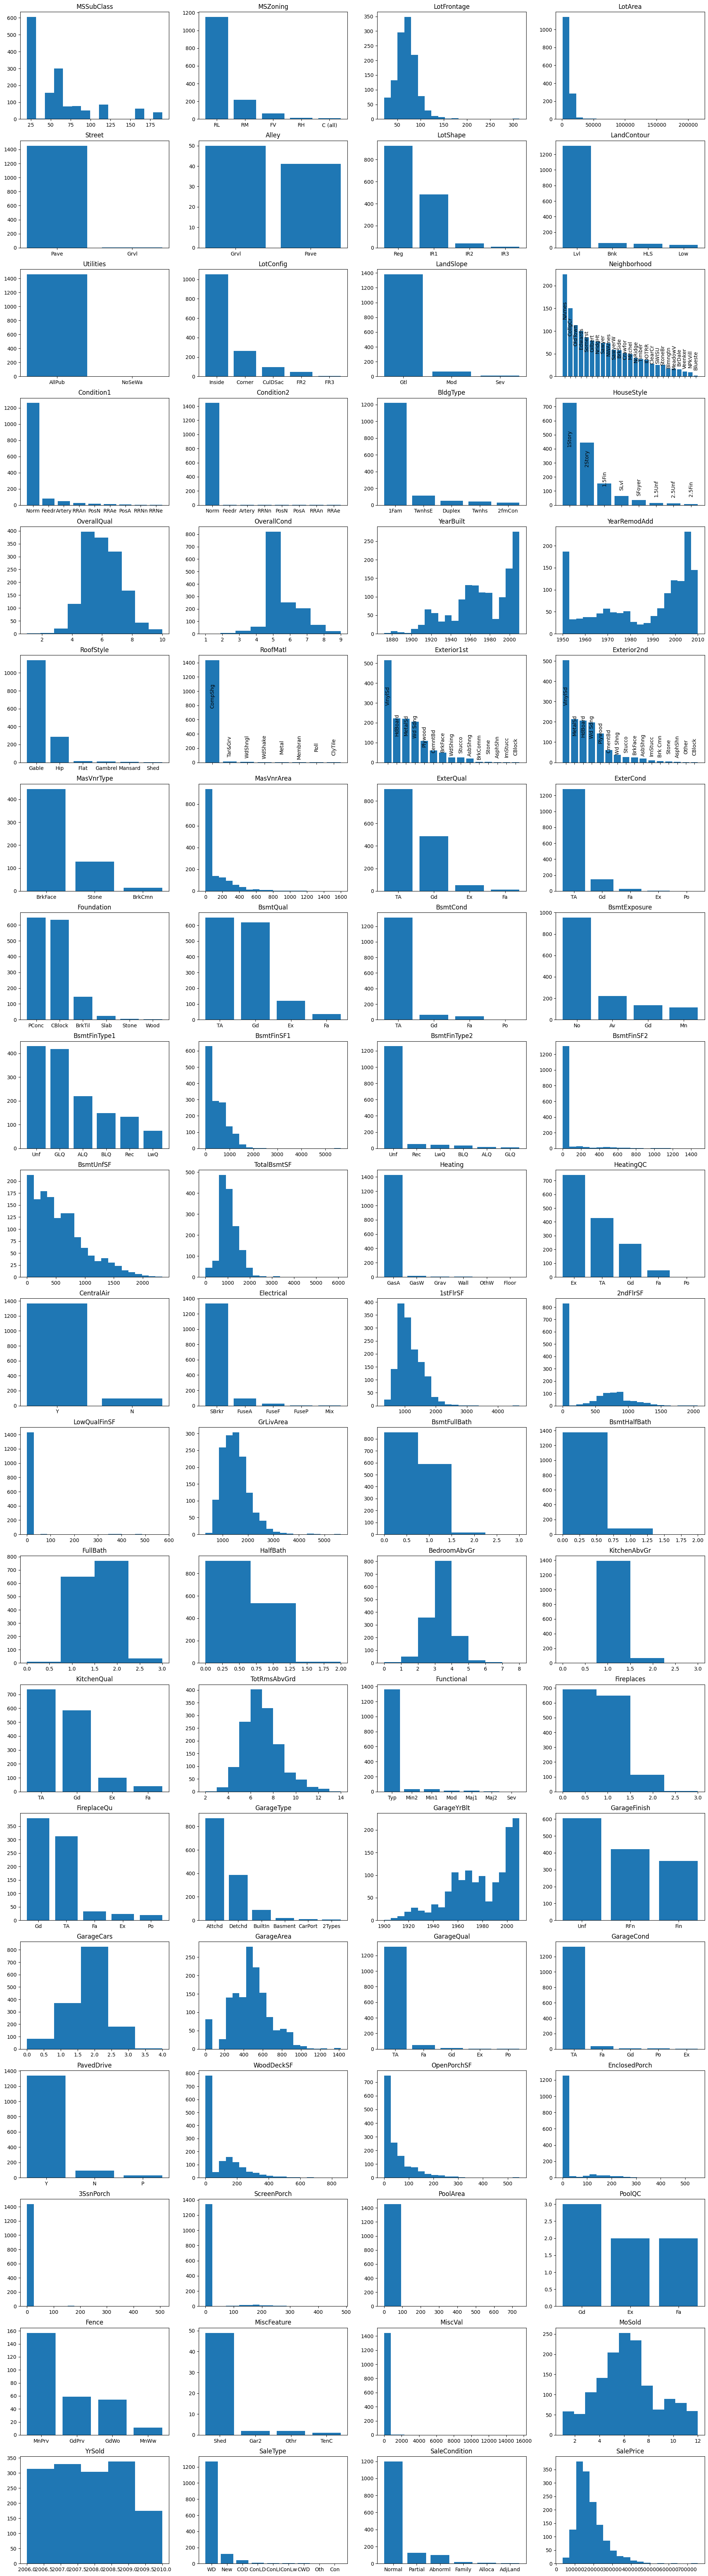

In [19]:
rows, cols = (20, 4)
fig, axs = plt.subplots(rows, cols, figsize=(cols*6, rows*4.5))
for i, col_i in enumerate(train_df.columns[1:]):
    row = i // cols
    col = i - cols*row
    
    if train_df[col_i].dtype=='object':
        vc = train_df[col_i].value_counts(dropna=True)
        if len(''.join(list(vc.index))) < 40:
            axs[row, col].bar(vc.index,vc.values)
        else:
            plot = axs[row, col].bar(vc.index,vc.values)
            plt.bar_label(plot, labels=vc.index, label_type='center', rotation=90, padding=30)
            axs[row, col].tick_params(labelbottom=False)
    elif train_df[col_i].nunique() < 20:
        axs[row, col].hist(train_df[col_i], bins=train_df[col_i].nunique())
    else:
        axs[row, col].hist(train_df[col_i], bins=20)  # could use a fancy formula here but hardcoding seems to work fine
    axs[row, col].set_title(col_i)

# plt.tight_layout()

In [49]:
sub_df = df.select_dtypes(exclude='object').dropna()
train_df, test_df = train_test_split(sub_df, test_size=0.2, random_state=1337) # is there a way to stratify this data?

lin_reg = LinearRegression()
model = lin_reg.fit(train_df.drop(columns=['Id', 'SalePrice']), train_df['SalePrice'])
test_df['PredSalePrice'] = model.predict(test_df.drop(columns=['Id', 'SalePrice']))

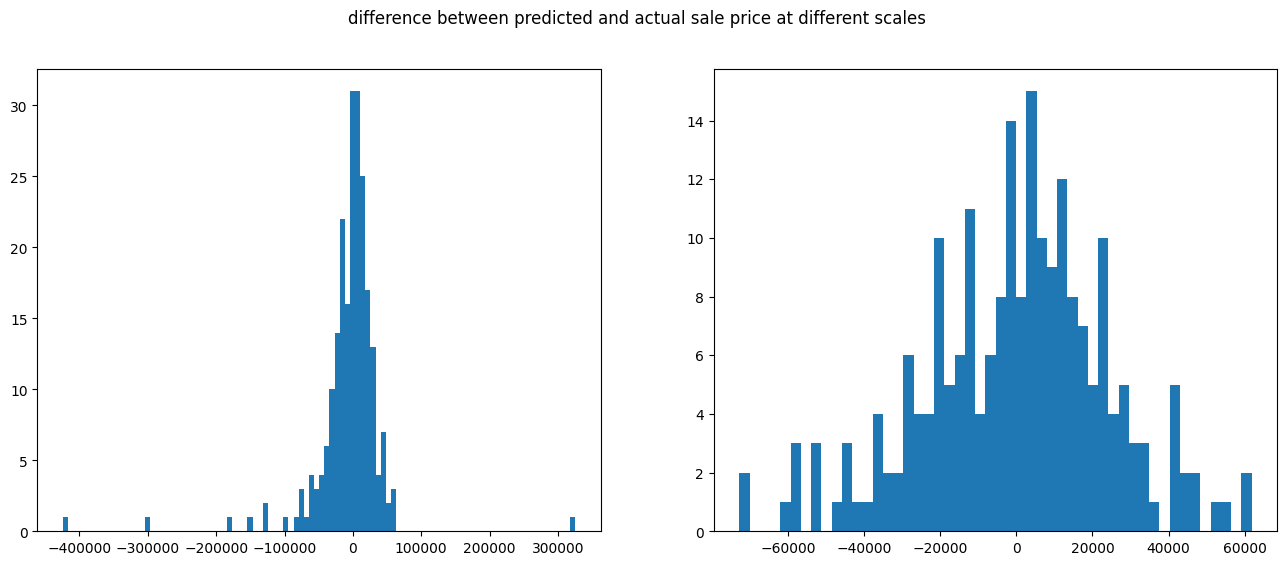

In [91]:
test_df['SalePriceDelta'] = test_df.apply(lambda x: x.PredSalePrice-x.SalePrice, axis=1)
sub_df = test_df['SalePriceDelta']

rows, cols = (1, 2)
fig, axs = plt.subplots(rows, cols, figsize=(cols*8, rows*6))
axs[0].hist(sub_df, bins=100)
axs[1].hist(sub_df[sub_df.apply(lambda x: abs(x) < 75_000)], bins=50)
fig.suptitle('difference between predicted and actual sale price at different scales')
plt.show()